In [3]:
import pandas as pd

In [4]:
df = pd.read_pickle("./data/df_concat_with_text_and_image_tokens.pkl")

In [5]:
df.head()

,questionId,question,question_types,image,docId,ucsf_document_id,ucsf_document_page_no,answers,data_split,image_path,text,llm_tokens_count,text_length,words_count,image_tokens
0,337,what is the date mentioned in this letter?,"[handwritten, form]",documents/xnbl0037_1.png,279,xnbl0037,1,[1/8/93],train,./images/spdocvqa_images/xnbl0037_1.png,<Page 1> Confidential .. .. RJRT PR APPROVAL D...,112,389,39,"{'patch_tokens': 1470, 'total_tokens': 2381.4,..."
1,338,what is the contact person name mentioned in l...,"[handwritten, form]",documents/xnbl0037_1.png,279,xnbl0037,1,"[P. Carter, p. carter]",train,./images/spdocvqa_images/xnbl0037_1.png,<Page 1> Confidential .. .. RJRT PR APPROVAL D...,112,389,39,"{'patch_tokens': 1470, 'total_tokens': 2381.4,..."
2,339,Which corporation's letterhead is this?,[layout],documents/mxcj0037_1.png,280,mxcj0037,1,[Brown & Williamson Tobacco Corporation],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
3,340,Who is in cc in this letter?,"[form, layout]",documents/mxcj0037_1.png,280,mxcj0037,1,[T.F. Riehl],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
4,341,what is the subject of this letter?,"[form, layout]",documents/mxcj0037_1.png,280,mxcj0037,1,[Review of existing Brainstorming Ideas/483],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."


In [6]:
df["data_split"].value_counts()

data_split
train    39463
val       5349
test      5188
Name: count, dtype: int64

In [7]:
question_types_expanded_df = df.explode("question_types")

<Axes: title={'center': 'Question Types by Data Split'}, xlabel='Data Split', ylabel='Count'>

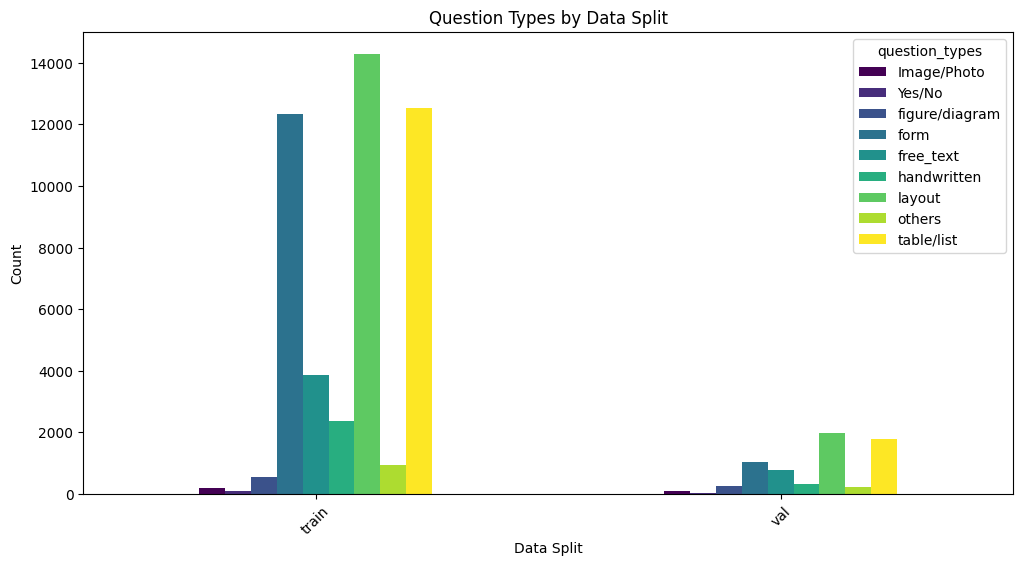

In [8]:
# plot question types by data split
question_types_expanded_df.groupby(["data_split", "question_types"]).size().unstack().plot(
    kind="bar",
    figsize=(12, 6),
    title="Question Types by Data Split",
    ylabel="Count",
    xlabel="Data Split",
    colormap="viridis",
    legend=True,
    rot=45,
)

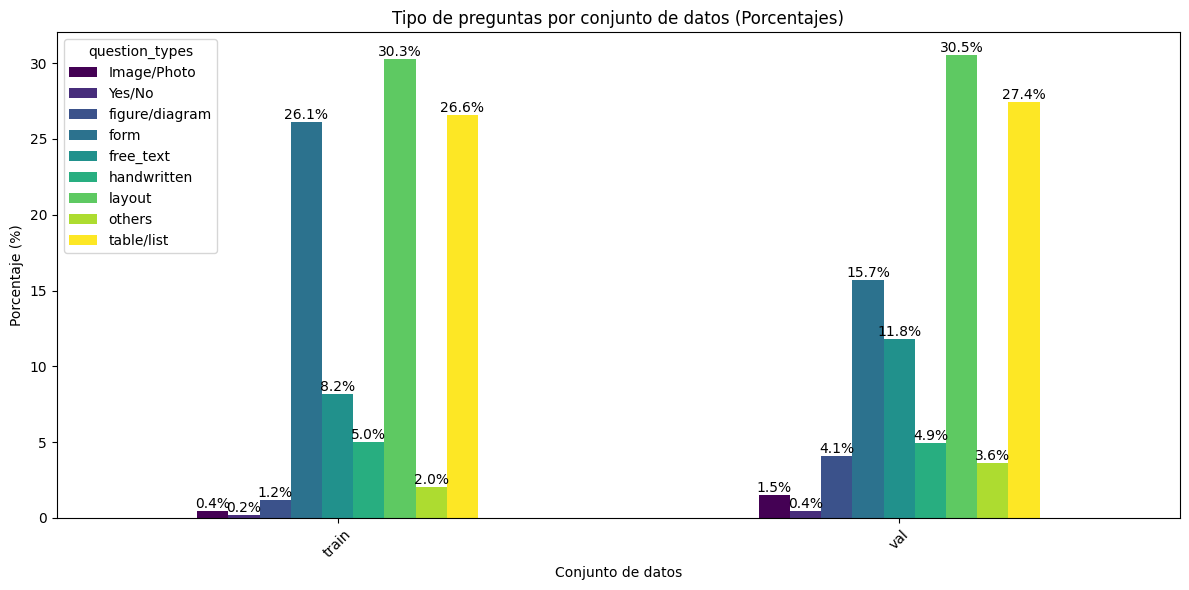

In [11]:
import matplotlib.pyplot as plt

# Calculate percentages within each data split
question_types_percent = question_types_expanded_df.groupby(["data_split", "question_types"]).size().unstack()
question_types_percent = question_types_percent.div(question_types_percent.sum(axis=1), axis=0) * 100

# Create the plot
ax = question_types_percent.plot(
    kind="bar",
    figsize=(12, 6),
    title="Tipo de preguntas por conjunto de datos (Porcentajes)",
    ylabel="Porcentaje (%)",
    xlabel="Conjunto de datos",
    colormap="viridis",
    legend=True,
    rot=45,
)

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

# Adjust layout to prevent label cutoff
plt.tight_layout()

In [12]:
# Getting 1 image per question type
sampled_images = question_types_expanded_df.groupby("question_types").apply(lambda x: x.sample(1)).reset_index(drop=True)

/tmp/ipykernel_34906/4118642427.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_images = question_types_expanded_df.groupby("question_types").apply(lambda x: x.sample(1)).reset_index(drop=True)


In [13]:
sampled_images

,questionId,question,question_types,image,docId,ucsf_document_id,ucsf_document_page_no,answers,data_split,image_path,text,llm_tokens_count,text_length,words_count,image_tokens
0,65442,"Where was ""Senior Olympics"" held?",Image/Photo,documents/kzhd0227_11.png,11027,kzhd0227,11,"[IRVINE, CALIFORNIA, Irvine, California]",train,./images/spdocvqa_images/kzhd0227_11.png,<Page 1> --10- AGE AS A LIMITING FACTOR IN REH...,470,2047,274,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
1,64367,what event factors had the greatest impact on ...,Yes/No,documents/qnmd0217_3.png,10220,qnmd0217,3,"[Speaker quality, speaker quality]",train,./images/spdocvqa_images/qnmd0217_3.png,<Page 1> EVENT 2: Page 3 of 3 The presentation...,494,2053,195,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
2,13328,What is the variable on X axis of the graph?,figure/diagram,documents/gmhh0077_40.png,4209,gmhh0077,40,"[rod length (mm), Rod Length (mm)]",train,./images/spdocvqa_images/gmhh0077_40.png,<Page 1> (57) 52138 6825 3.6 3.4 0 SS WTPM /Pu...,98,172,9,"{'patch_tokens': 1530, 'total_tokens': 2478.60..."
3,36551,is the applicant married ?,form,documents/rrwg0227_1.png,10543,rrwg0227,1,"[Yes, yes]",train,./images/spdocvqa_images/rrwg0227_1.png,<Page 1> Standard Form No. 60 June 1946 APPLIC...,1568,6205,785,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
4,55178,An application for an export licence may be ob...,free_text,documents/gqdg0072_1.png,4171,gqdg0072,1,"[The U.S. department of commerce, U.S. Departm...",train,./images/spdocvqa_images/gqdg0072_1.png,"<Page 1> REVISION 1 . SECTION 4 , PAGE 1 OF 3 ...",535,2587,332,"{'patch_tokens': 1530, 'total_tokens': 2478.60..."
5,51166,What is the name of the person given in the ad...,handwritten,documents/qlcn0226_1.png,838,qlcn0226,1,[Wendy Cleland Hamnett],train,./images/spdocvqa_images/qlcn0226_1.png,<Page 1> you do not Know me However MAR 07 201...,64,215,18,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
6,1714,What is the heading of the point B?,layout,documents/jzbn0226_31.png,718,jzbn0226,31,[Exposure Potential Ranking],train,./images/spdocvqa_images/jzbn0226_31.png,<Page 1> screening for potential endocrine act...,597,3217,375,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
7,26650,what is the designation of Robert E. Shank ?,others,documents/hnlg0227_1.png,7468,hnlg0227,1,"[Danforth Professor of Preventive Medicine, Da...",train,./images/spdocvqa_images/hnlg0227_1.png,<Page 1> INSTRUCTIONS: When application is com...,553,2137,212,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."
8,22732,Whats the TOTAL cost of the items requested?,table/list,documents/xrcy0227_13.png,6558,xrcy0227,13,"[4.46, 446]",train,./images/spdocvqa_images/xrcy0227_13.png,<Page 1> ORIGINATING DEPT. THE ROCKEFELLER UNI...,233,672,75,"{'patch_tokens': 1496, 'total_tokens': 2423.52..."


In [17]:
df["image_tokens_only"]=df["image_tokens"].apply(lambda x: x["patch_tokens"] if isinstance(x, dict) else None)

In [19]:
df["total_tokens"] = df["llm_tokens_count"] + df["image_tokens_only"]

In [43]:
import tiktoken

def get_token_count(text):
    encoding = tiktoken.encoding_for_model("gpt-4")
    return len(encoding.encode(text))



def get_answer_tokens_count(text):
    if not text:
        return None
    encoding = tiktoken.encoding_for_model("gpt-4")
    if isinstance(text, str):
        return len(encoding.encode(text))
    elif isinstance(text, list):
        # If text is a list, average the token count of all answers
        return sum(len(encoding.encode(answer)) for answer in text) / len(text)
    else:
        return 0
    return 0

In [ ]:
df["question_tokens_count"] = df["question"].apply(get_token_count)

In [44]:
df["answer_tokens_count"] = df["answers"].apply(get_answer_tokens_count)

In [40]:
df

,questionId,question,question_types,image,docId,ucsf_document_id,ucsf_document_page_no,answers,data_split,image_path,text,llm_tokens_count,text_length,words_count,image_tokens,image_tokens_only,total_tokens,question_tokens_count,question_complexity,answer_tokens_count
0,337,what is the date mentioned in this letter?,"[handwritten, form]",documents/xnbl0037_1.png,279,xnbl0037,1,[1/8/93],train,./images/spdocvqa_images/xnbl0037_1.png,<Page 1> Confidential .. .. RJRT PR APPROVAL D...,112,389,39,"{'patch_tokens': 1470, 'total_tokens': 2381.4,...",1470,1582,9,0.080357,5.0
1,338,what is the contact person name mentioned in l...,"[handwritten, form]",documents/xnbl0037_1.png,279,xnbl0037,1,"[P. Carter, p. carter]",train,./images/spdocvqa_images/xnbl0037_1.png,<Page 1> Confidential .. .. RJRT PR APPROVAL D...,112,389,39,"{'patch_tokens': 1470, 'total_tokens': 2381.4,...",1470,1582,10,0.089286,3.5
2,339,Which corporation's letterhead is this?,[layout],documents/mxcj0037_1.png,280,mxcj0037,1,[Brown & Williamson Tobacco Corporation],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246,"{'patch_tokens': 1496, 'total_tokens': 2423.52...",1496,1947,8,0.017738,5.0
3,340,Who is in cc in this letter?,"[form, layout]",documents/mxcj0037_1.png,280,mxcj0037,1,[T.F. Riehl],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246,"{'patch_tokens': 1496, 'total_tokens': 2423.52...",1496,1947,9,0.019956,6.0
4,341,what is the subject of this letter?,"[form, layout]",documents/mxcj0037_1.png,280,mxcj0037,1,[Review of existing Brainstorming Ideas/483],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246,"{'patch_tokens': 1496, 'total_tokens': 2423.52...",1496,1947,9,0.019956,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,16372,On which date was the memorandam send ?,NaN,documents/lflm0081_1.png,5160,lflm0081,1,NaN,test,./images/spdocvqa_images/lflm0081_1.png,<Page 1> MEMORANDUM TO : W. C. Combs Product R...,107,443,52,"{'patch_tokens': 1496, 'total_tokens': 2423.52...",1496,1603,10,0.093458,0.0
49996,16380,What is the extension number of Jo Spach ?,NaN,documents/lflm0081_1.png,5160,lflm0081,1,NaN,test,./images/spdocvqa_images/lflm0081_1.png,<Page 1> MEMORANDUM TO : W. C. Combs Product R...,107,443,52,"{'patch_tokens': 1496, 'total_tokens': 2423.52...",1496,1603,10,0.093458,0.0
49997,57341,What is the net worth in 2012 (Rs. Cr.)?,NaN,documents/rnbx0223_193.png,4720,rnbx0223,193,NaN,test,./images/spdocvqa_images/rnbx0223_193.png,<Page 1> ITC Limited . Report and Accounts 201...,352,960,78,"{'patch_tokens': 1472, 'total_tokens': 2384.64...",1472,1824,15,0.042614,0.0
49998,61872,What is the cost of supplies for the 3rd year?,NaN,documents/hrfw0227_24.png,8103,hrfw0227,24,NaN,test,./images/spdocvqa_images/hrfw0227_24.png,<Page 1> SECTION II - PRIVILEGED COMMUNICATION...,495,1723,162,"{'patch_tokens': 1496, 'total_tokens': 2423.52...",1496,1991,13,0.026263,0.0


Text(0.5, 1.0, 'Test Total Tokens Count')

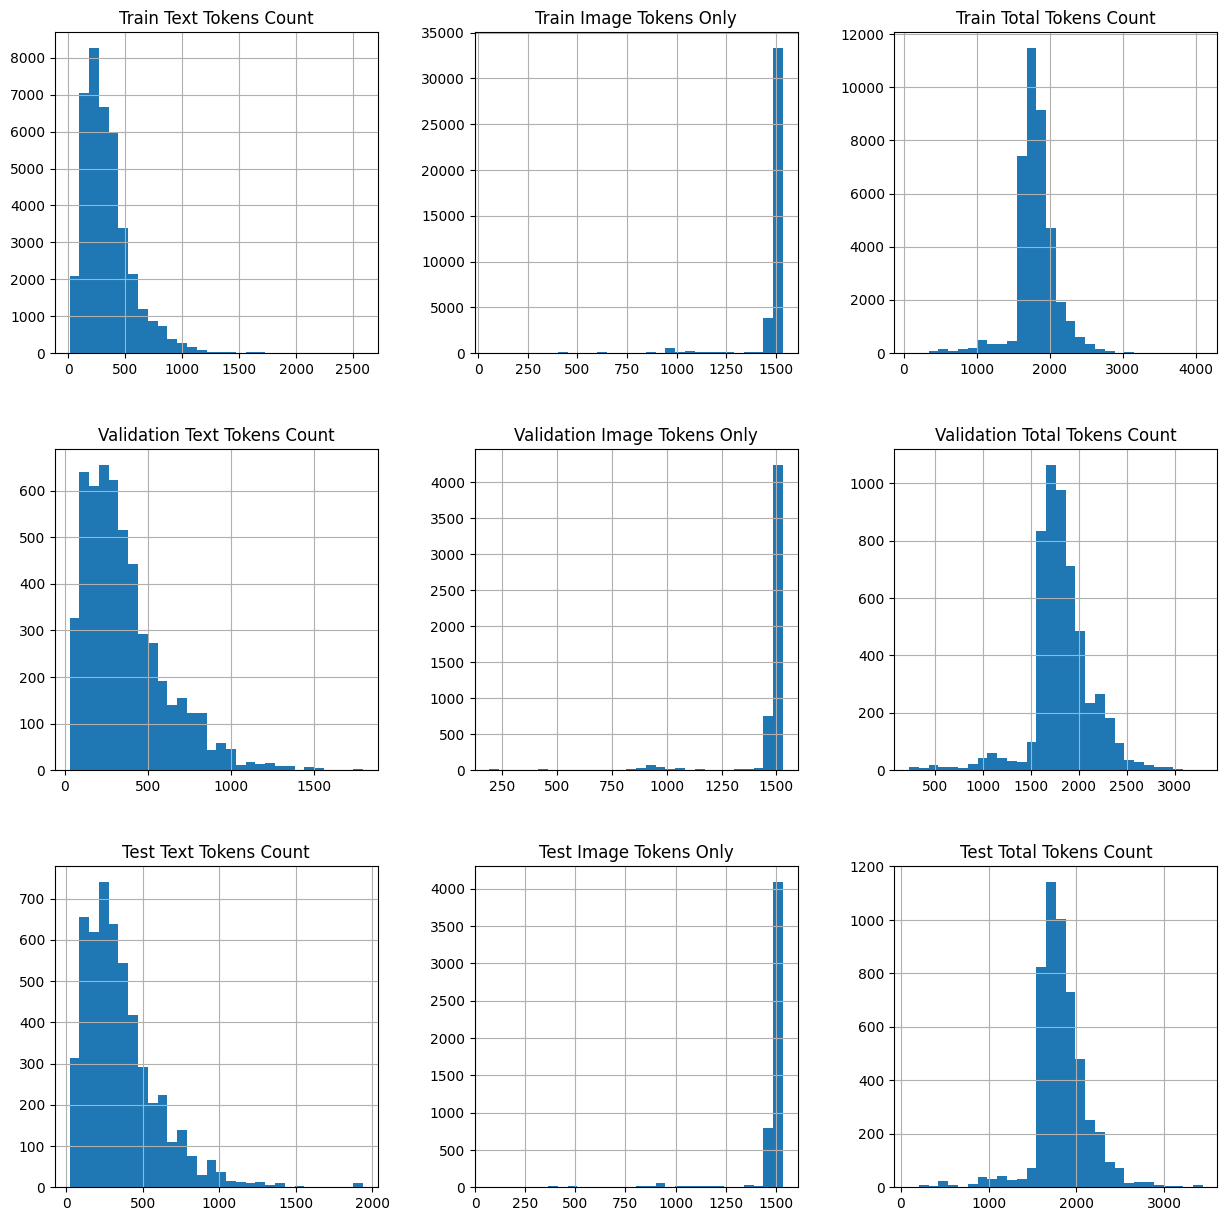

In [25]:
# 3 by 3 grid of histograms
# First row train, second row validation, third row test
# First column llm_tokens_count, image_tokens_only, total_tokens_count
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
# Plot for train data split
df[df["data_split"] == "train"].hist(column=["llm_tokens_count", "image_tokens_only", "total_tokens"], ax=axes[0], bins=30)
axes[0, 0].set_title("Train Text Tokens Count")
axes[0, 1].set_title("Train Image Tokens Only")
axes[0, 2].set_title("Train Total Tokens Count")
# Plot for validation data split
df[df["data_split"] == "val"].hist(column=["llm_tokens_count", "image_tokens_only", "total_tokens"], ax=axes[1], bins=30)
axes[1, 0].set_title("Validation Text Tokens Count")
axes[1, 1].set_title("Validation Image Tokens Only")
axes[1, 2].set_title("Validation Total Tokens Count")
# Plot for test data split  
df[df["data_split"] == "test"].hist(column=["llm_tokens_count", "image_tokens_only", "total_tokens"], ax=axes[2], bins=30)
axes[2, 0].set_title("Test Text Tokens Count")
axes[2, 1].set_title("Test Image Tokens Only")
axes[2, 2].set_title("Test Total Tokens Count") 



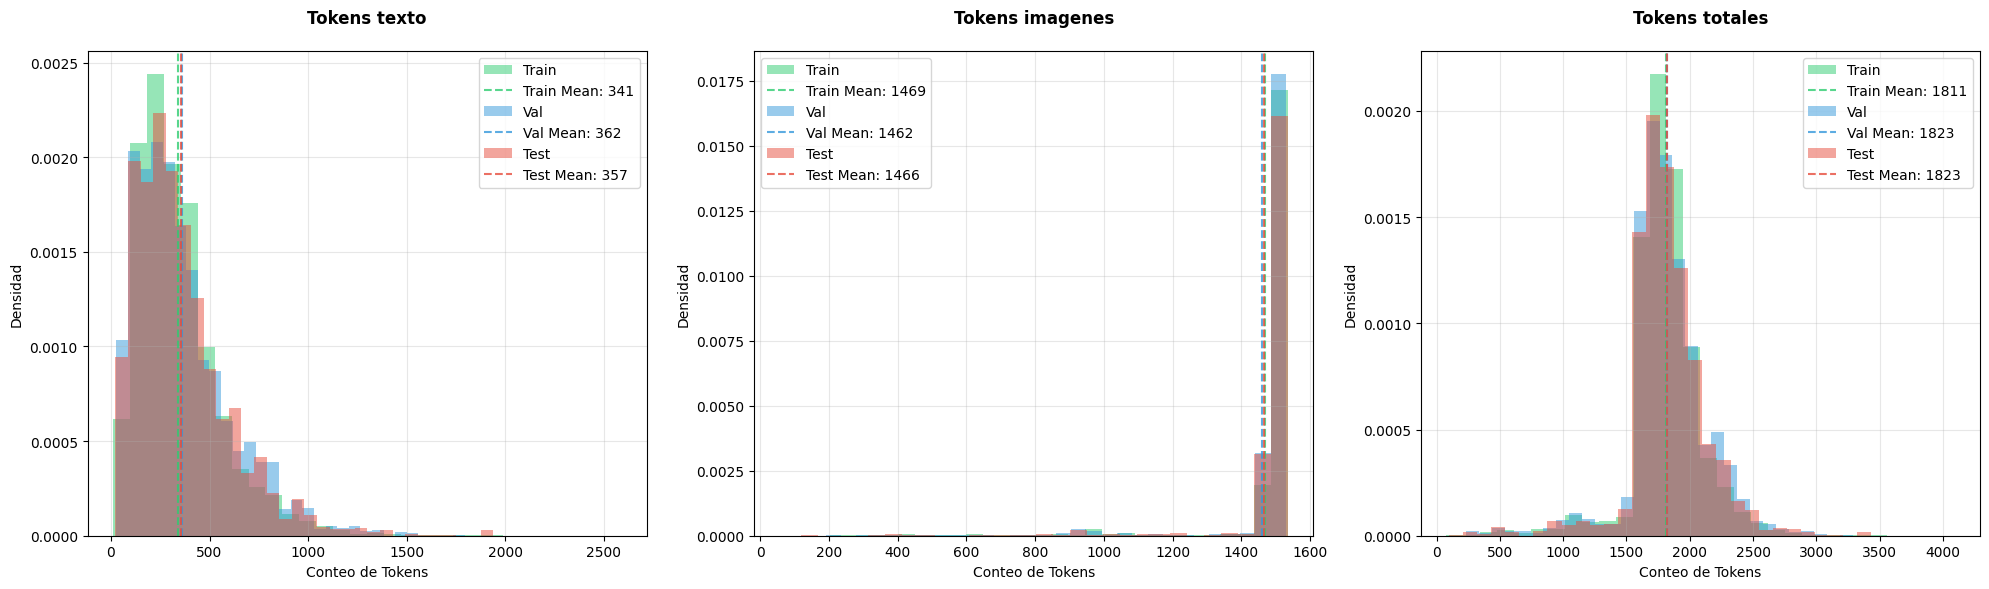

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Define colors for each data split
colors = {
    'train': '#2ecc71',  # green
    'val': '#3498db',    # blue
    'test': '#e74c3c'    # red
}

# Define the columns to plot
columns = ['llm_tokens_count', 'image_tokens_only', 'total_tokens']
titles = ['Tokens texto', 'Tokens imagenes', 'Tokens totales']

# Plot histograms for each column
for idx, (col, title) in enumerate(zip(columns, titles)):
    for split in ['train', 'val', 'test']:
        data = df[df['data_split'] == split][col]
        axes[idx].hist(data, bins=30, alpha=0.5, 
                      label=split.capitalize(), 
                      color=colors[split],
                      density=True)  # Using density=True for better comparison
        
        # Add mean line
        mean_val = data.mean()
        axes[idx].axvline(mean_val, color=colors[split], 
                         linestyle='--', alpha=0.8,
                         label=f'{split.capitalize()} Mean: {mean_val:.0f}')
    
    # Customize each subplot
    axes[idx].set_title(title, pad=20, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Conteo de Tokens')
    axes[idx].set_ylabel('Densidad')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

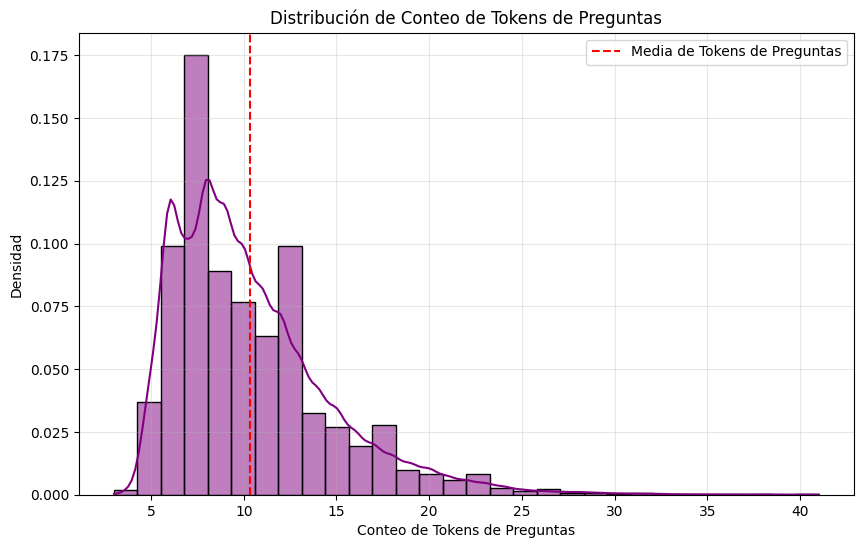

In [33]:
# plotting the distribution of question tokens count
plt.figure(figsize=(10, 6))
sns.histplot(df['question_tokens_count'], bins=30, kde=True, color='purple', stat='density')
plt.title('Distribución de Conteo de Tokens de Preguntas')
plt.xlabel('Conteo de Tokens de Preguntas')
plt.ylabel('Densidad')
plt.axvline(df['question_tokens_count'].mean(), color='red', linestyle='--', label='Media de Tokens de Preguntas')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [46]:
def estimate_question_complexity(row):
    """
    Estimate the complexity of a question based on its token count vs the length of the text in the document.
    """
    question_tokens = row['answer_tokens_count']
    document_tokens = row['llm_tokens_count']
    if document_tokens == 0:
        return 'Unknown'  # Avoid division by zero
    ratio = question_tokens / document_tokens
    return ratio

df['question_complexity'] = df[df["data_split"].isin(["val","train"])].apply(estimate_question_complexity, axis=1)

In [48]:
df

,questionId,question,question_types,image,docId,ucsf_document_id,ucsf_document_page_no,answers,data_split,image_path,text,llm_tokens_count,text_length,words_count,image_tokens,image_tokens_only,total_tokens,question_tokens_count,question_complexity,answer_tokens_count
0,337,what is the date mentioned in this letter?,"[handwritten, form]",documents/xnbl0037_1.png,279,xnbl0037,1,[1/8/93],train,./images/spdocvqa_images/xnbl0037_1.png,<Page 1> Confidential .. .. RJRT PR APPROVAL D...,112,389,39,"{'patch_tokens': 1470, 'total_tokens': 2381.4,...",1470,1582,9,0.044643,5.0
1,338,what is the contact person name mentioned in l...,"[handwritten, form]",documents/xnbl0037_1.png,279,xnbl0037,1,"[P. Carter, p. carter]",train,./images/spdocvqa_images/xnbl0037_1.png,<Page 1> Confidential .. .. RJRT PR APPROVAL D...,112,389,39,"{'patch_tokens': 1470, 'total_tokens': 2381.4,...",1470,1582,10,0.031250,3.5
2,339,Which corporation's letterhead is this?,[layout],documents/mxcj0037_1.png,280,mxcj0037,1,[Brown & Williamson Tobacco Corporation],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246,"{'patch_tokens': 1496, 'total_tokens': 2423.52...",1496,1947,8,0.011086,5.0
3,340,Who is in cc in this letter?,"[form, layout]",documents/mxcj0037_1.png,280,mxcj0037,1,[T.F. Riehl],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246,"{'patch_tokens': 1496, 'total_tokens': 2423.52...",1496,1947,9,0.013304,6.0
4,341,what is the subject of this letter?,"[form, layout]",documents/mxcj0037_1.png,280,mxcj0037,1,[Review of existing Brainstorming Ideas/483],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246,"{'patch_tokens': 1496, 'total_tokens': 2423.52...",1496,1947,9,0.019956,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,16372,On which date was the memorandam send ?,NaN,documents/lflm0081_1.png,5160,lflm0081,1,NaN,test,./images/spdocvqa_images/lflm0081_1.png,<Page 1> MEMORANDUM TO : W. C. Combs Product R...,107,443,52,"{'patch_tokens': 1496, 'total_tokens': 2423.52...",1496,1603,10,NaN,0.0
49996,16380,What is the extension number of Jo Spach ?,NaN,documents/lflm0081_1.png,5160,lflm0081,1,NaN,test,./images/spdocvqa_images/lflm0081_1.png,<Page 1> MEMORANDUM TO : W. C. Combs Product R...,107,443,52,"{'patch_tokens': 1496, 'total_tokens': 2423.52...",1496,1603,10,NaN,0.0
49997,57341,What is the net worth in 2012 (Rs. Cr.)?,NaN,documents/rnbx0223_193.png,4720,rnbx0223,193,NaN,test,./images/spdocvqa_images/rnbx0223_193.png,<Page 1> ITC Limited . Report and Accounts 201...,352,960,78,"{'patch_tokens': 1472, 'total_tokens': 2384.64...",1472,1824,15,NaN,0.0
49998,61872,What is the cost of supplies for the 3rd year?,NaN,documents/hrfw0227_24.png,8103,hrfw0227,24,NaN,test,./images/spdocvqa_images/hrfw0227_24.png,<Page 1> SECTION II - PRIVILEGED COMMUNICATION...,495,1723,162,"{'patch_tokens': 1496, 'total_tokens': 2423.52...",1496,1991,13,NaN,0.0


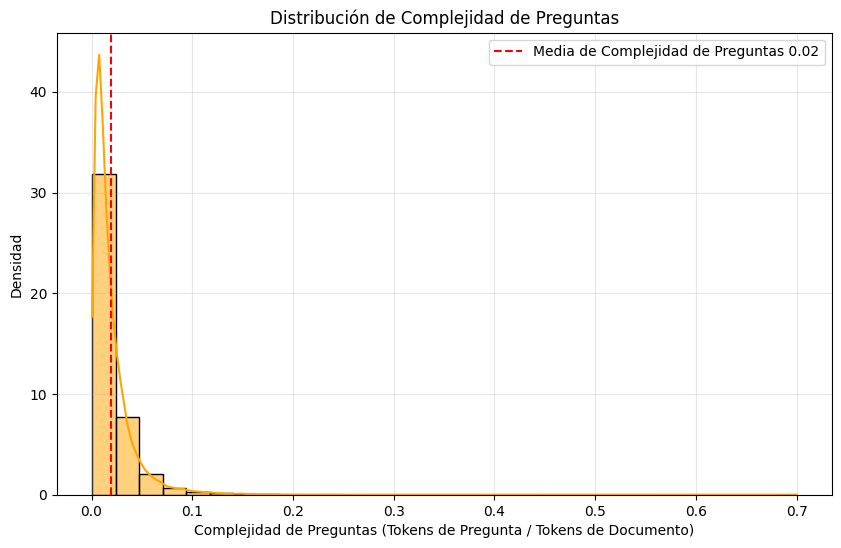

In [50]:
# Plotting the distribution of question complexity
plt.figure(figsize=(10, 6))
sns.histplot(df[df["data_split"].isin(["val","train"])]['question_complexity'], bins=30, kde=True, color='orange', stat='density')
plt.title('Distribución de Complejidad de Preguntas')
plt.xlabel('Complejidad de Preguntas (Tokens de Pregunta / Tokens de Documento)')
plt.ylabel('Densidad')
plt.axvline(df['question_complexity'].mean(), color='red', linestyle='--', label=f'Media de Complejidad de Preguntas {df['question_complexity'].mean():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

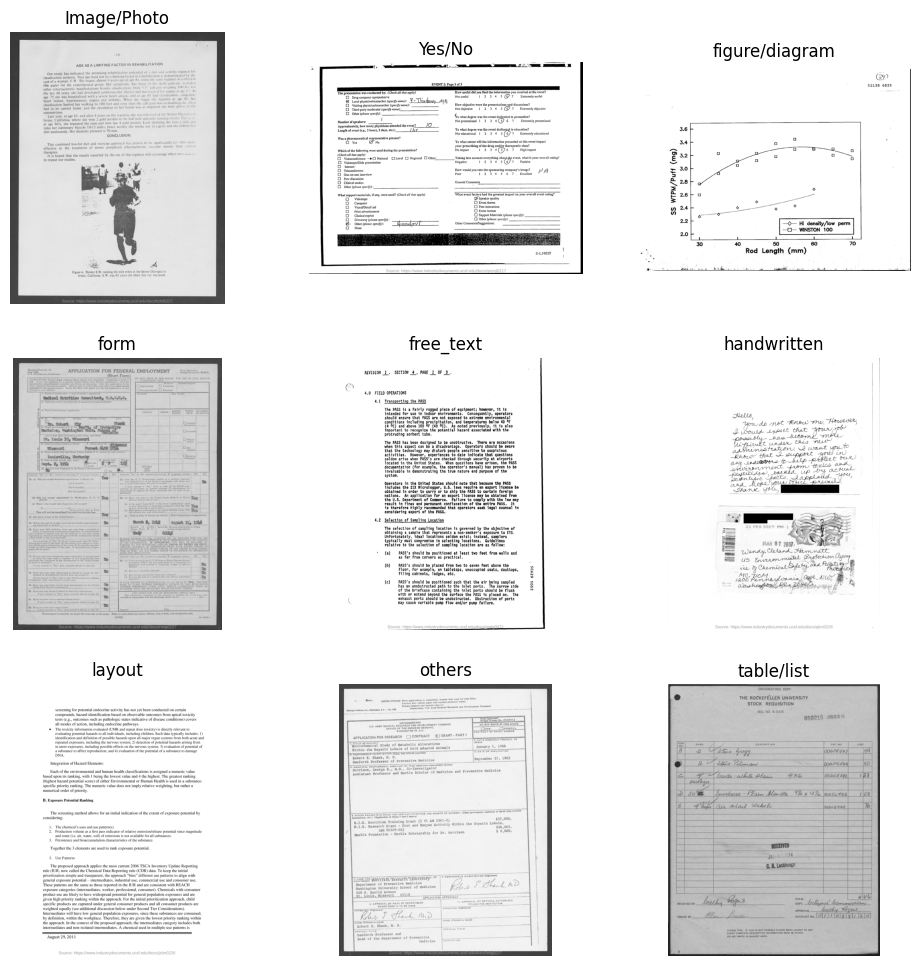

In [15]:
# Creating a 3x3 grid of images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()
for ax, (index, row) in zip(axes, sampled_images.iterrows()):
    img_path = row["image_path"]
    img = Image.open(img_path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    ax.imshow(img)
    ax.set_title(row["question_types"])
    ax.axis('off')